The problem: I have some frequency content and I want to synthesize the waveform.

Let's do it first with a forward FFT and a backward summation and then from the frequency domain directly.

# Forward FFT 

Let's say I have a signal.

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
x = lambda t: np.cos(t) * np.abs(np.sin(t))

In [8]:
def sample(func, t):
    "Samples a function at given intervals."
    return func(t)

In [11]:
t_discrete = np.arange(0, 10, 0.5)
t_continuous = np.arange(0, 10, 0.05)

<IPython.core.display.Javascript object>


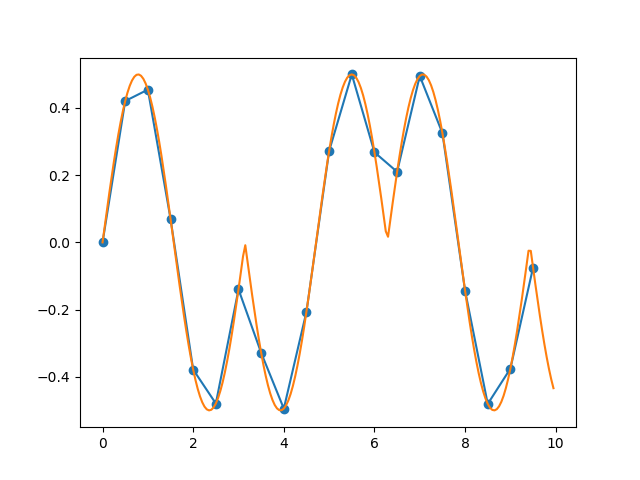

In [19]:
plt.figure()
plt.plot(t_discrete, sample(x, t_discrete), '-o')
plt.plot(t_continuous, sample(x, t_continuous))

The function is periodic of period $4 \pi$.

Let's do a FFT from the discrete spectrum.

In [24]:
N = 128
X = np.fft.rfft(sample(x, t_discrete), n=N)
freqs = np.fft.rfftfreq(N)

<IPython.core.display.Javascript object>


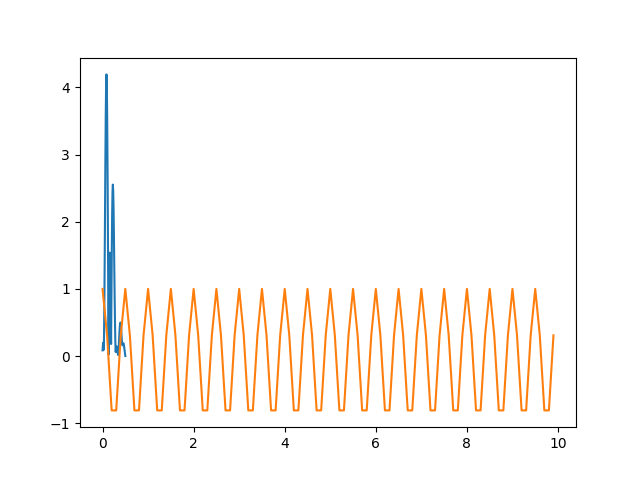

In [25]:
plt.figure()
plt.plot(freqs, np.abs(X))

# Starting in the frequency domain 

Let's say I have a signal that is defined by a vector of frequencies and weights.

In [26]:
freqs = np.array([2.])
weights = np.array([1.])

I can synthesize this signal by summing complex exponentials (think phasors as illustrated here: <https://jackschaedler.github.io/circles-sines-signals/dft_introduction.html>).

And to evaluate this, I also need a time vector.

In [37]:
def synthesize(freqs, weights, t):
    """Synthesizes a real signal from frequencies and weights.
    Evaluates the synthesized signal over times t."""
    synth = np.zeros_like(t, dtype=np.float)
    for freq, weight in zip(freqs, weights):
        basis_func = np.exp(1j * 2 * np.pi * freq * t)
        synth += np.real(weight * basis_func)
    return synth

In [39]:
t = np.arange(0, 10, 0.1)
synth = synthesize(freqs, weights, t)

Let's check the synthesis for different time vectors:

In [58]:
def check_nyquist_shannon(highest_freq):
    """Checking routine for the Nyquist-Shannon theorem.
    Given the highest frequency in your spectrum data, in Hz,
    it prints a diagnostic message."""
    dt = 1 / (2 * highest_freq)
    df = 1 /dt
    print("High freq is: {:.2e} Hz, so your sample dt should be at least {:.2e} s".format(highest_freq, dt))
    print("This corresponds to a sample frequency of {:.2e} Hz".format(df))

<IPython.core.display.Javascript object>


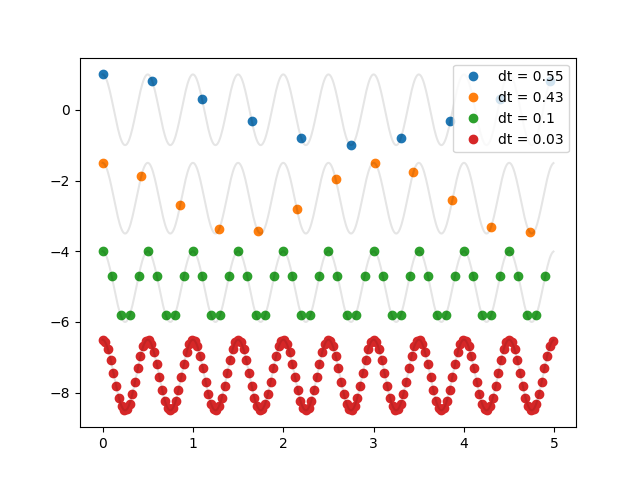

In [61]:
plt.figure()
t_perfect = np.arange(0, 5, 0.01)
offset = 2.5
for ind, dt in enumerate([0.55, 0.43, 0.1, 0.03]):
    t = np.arange(0, 5, dt)
    synth = synthesize(freqs, weights, t)
    plt.plot(t, synth - offset*ind, 'o', label='dt = {}'.format(dt))
    plt.plot(t_perfect, synthesize(freqs, weights, t_perfect) - offset*ind, '-k', alpha=0.1)
plt.legend()

In [62]:
check_nyquist_shannon(freqs.max())

High freq is: 2.00e+00 Hz, so your sample dt should be at least 2.50e-01 s
This corresponds to a sample frequency of 4.00e+00 Hz


Let's do another check.

In [63]:
freqs = np.array([2., 2.1, 2.2, 2.3, 2.4])
weights = np.array([1., 2., 3., 2., 1.])

<IPython.core.display.Javascript object>


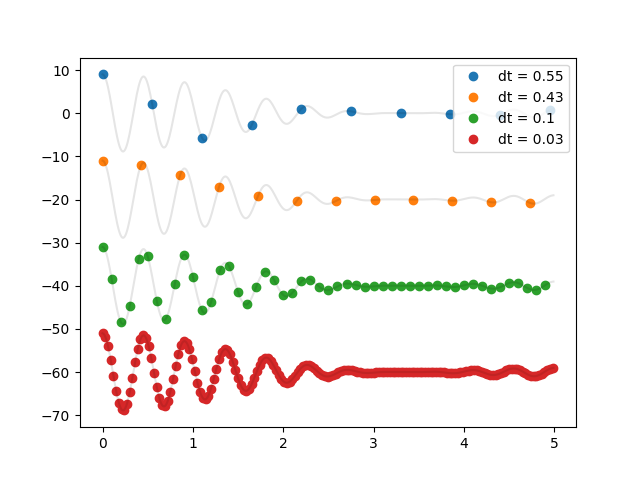

In [68]:
plt.figure()
t_perfect = np.arange(0, 5, 0.01)
offset = 20
for ind, dt in enumerate([0.55, 0.43, 0.1, 0.03]):
    t = np.arange(0, 5, dt)
    synth = synthesize(freqs, weights, t)
    plt.plot(t, synth - offset*ind, 'o', label='dt = {}'.format(dt))
    plt.plot(t_perfect, synthesize(freqs, weights, t_perfect) - offset*ind, '-k', alpha=0.1)
plt.legend()

In [66]:
check_nyquist_shannon(freqs.max())

High freq is: 2.40e+00 Hz, so your sample dt should be at least 2.08e-01 s
This corresponds to a sample frequency of 4.80e+00 Hz
